# Fashion Categorizer

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [140]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [141]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Need to scale values to b/w 0 and 1. Divide by 255 to do so. 

In [142]:
train_images = train_images/255.0
test_images = test_images/255.0

## First Model

In [11]:
model = tf.keras.Sequential([
    # Flatten the data from 2d array (28 x 28 pixels) to 1d array (784 pixels)
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # Adds layer w 128 neurons to the model
    # RELU- introduces non-linearity
    tf.keras.layers.Dense(128, activation='relu'),

    # Linear activation, output layer for our 10 classes
    tf.keras.layers.Dense(10)
])

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',
              # computationally efficient + has little memory requirement
              
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # minimize this
              
              metrics=['accuracy']
              # monitor training + testing steps
             )

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.5731 - loss: 1.4778
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.7611 - loss: 0.6568
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.7970 - loss: 0.5679
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.8166 - loss: 0.5163
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.8286 - loss: 0.4859
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8350 - loss: 0.4680
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.8379 - loss: 0.4541
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.8448 - loss: 0.4373
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.8488 - loss: 0.4302
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step - accuracy: 0.8500 - loss: 0.4271


Evaluate test dataset performance:

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 447us/step - accuracy: 0.8375 - loss: 0.4503

Test accuracy: 0.8374999761581421


Training accuracy > test accuracy -> potential overfitting, let's try to fix this here with `Dropout`:

In [15]:
model = tf.keras.Sequential([
    # Flatten the data from 2d array (28 x 28 pixels) to 1d array (784 pixels)
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # Adds layer w 128 neurons to the model
    # RELU- introduces non-linearity
    tf.keras.layers.Dense(128, activation='relu'),

    # Dropout layer with a dropout rate of 20% -> prevents model from becoming too dependent on one feature
    tf.keras.layers.Dropout(0.2),  

    # Linear activation, output layer for our 10 classes
    tf.keras.layers.Dense(10)
])

In [16]:
model.compile(optimizer='adam',
              # computationally efficient + has little memory requirement
              
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # minimize this
              
              metrics=['accuracy']
              # monitor training + testing steps
             )

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5173 - loss: 1.5361
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7441 - loss: 0.7159
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7764 - loss: 0.6179
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.7965 - loss: 0.5660
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.8117 - loss: 0.5290
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.8192 - loss: 0.5102
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - accuracy: 0.8264 - loss: 0.4882
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 827us/step - accuracy: 0.8305 - loss: 0.4696
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.8364 - loss: 0.4645
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.8399 - loss: 0.4491


In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8365 - loss: 0.4525

Test accuracy: 0.8364999890327454


Pretty similar test and training accuracies now! But testing accuracy is still a little lower than what's ideal - let's try experimenting with a CNN and see if it works better.

## Working with a CNN

Need to change channel dimension for CNN. (width, height, depth)

In [81]:
train_images = train_images.reshape(-1, 28, 28, 1) # -1: # of images, 28: width, 28: height, 1: # channels
test_images = test_images.reshape(-1, 28, 28, 1)

Remove dropping and replace with max pooling to prevent overfitting: 

In [96]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              # computationally efficient + has little memory requirement
              
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # minimize this
              
              metrics=['accuracy']
              # monitor training + testing steps
             )

history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5812 - loss: 1.2174 - val_accuracy: 0.7641 - val_loss: 0.6083
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7963 - loss: 0.5525 - val_accuracy: 0.8099 - val_loss: 0.5213
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8270 - loss: 0.4833 - val_accuracy: 0.8302 - val_loss: 0.4750
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8406 - loss: 0.4526 - val_accuracy: 0.8383 - val_loss: 0.4498
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8496 - loss: 0.4223 - val_accuracy: 0.8448 - val_loss: 0.4334
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8550 - loss: 0.4086 - val_accuracy: 0.8499 - val_loss: 0.4249
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8605 - loss: 0.3946 - val_accuracy: 0.8456 - val_loss: 0.4293
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8629 - lo

In [97]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8719 - loss: 0.3579

Test accuracy: 0.8719000220298767


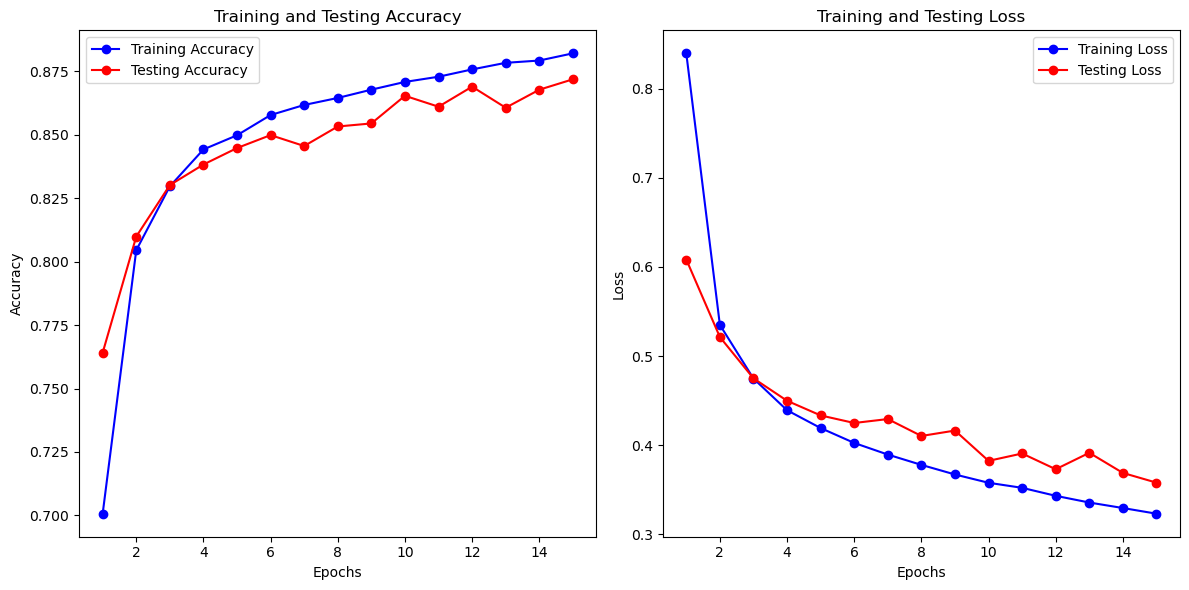

In [98]:
training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
testing_loss = history.history['val_loss']

epochs = range(1, len(training_accuracy) + 1)

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, testing_accuracy, 'ro-', label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, testing_loss, 'ro-', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [100]:
print(training_accuracy[-1] - test_acc)

0.010233283042907715


Marginal 0.01 difference between training and testing accuracy. 

In [101]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Classification Results: Visualizations

Adapted from https://www.tensorflow.org/tutorials/keras/classification

In [143]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

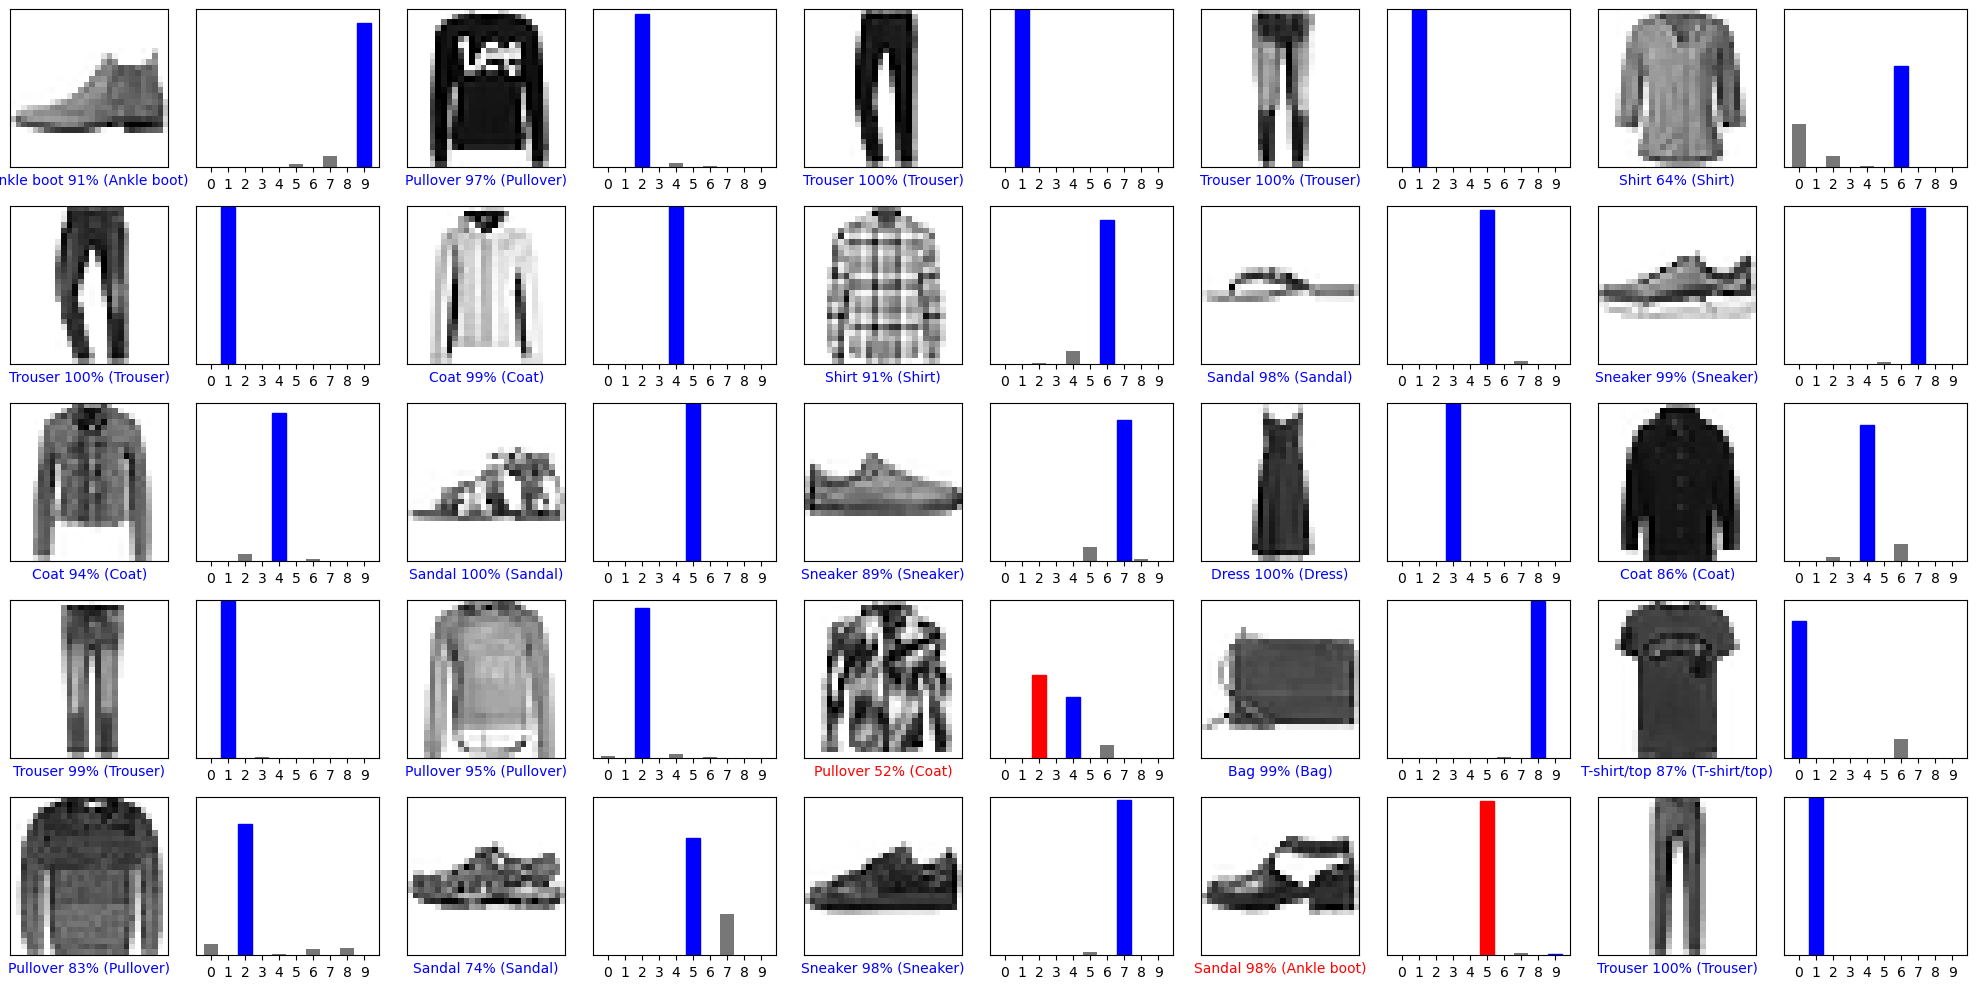

In [144]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
[[1.4729279e-02 5.7584798e-04 9.5104998e-01 3.3445109e-04 2.5980629e-02
  4.3430714e-07 7.0496364e-03 1.4734691e-09 2.7817549e-04 1.5788575e-06]]


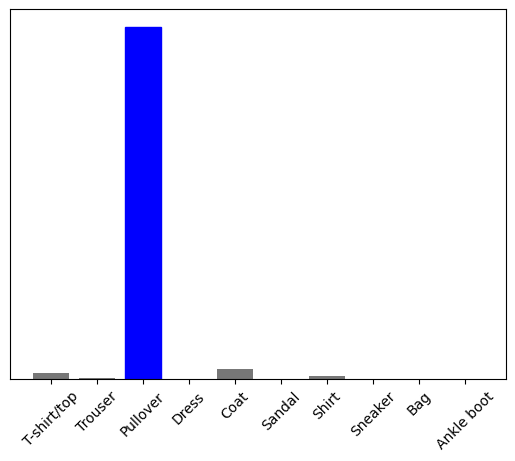

2


In [137]:
img = test_images[16]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()
print(np.argmax(predictions_single[0]))